<a href="https://colab.research.google.com/github/Tiagoeem/testes_git_python_renderers/blob/master/Teste_Libs_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook tem o intuito de comparar algumas bibliotecas para geração de gráficos. Principalemnte com relação ao seu desempenho e renderização estatica no github.




In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
from sklearn.datasets import make_blobs
# Criando um buzilão de dados
n_samples = 60000
n_dimensions = 3

X, y = make_blobs(n_samples=n_samples, centers=60, n_features=3, cluster_std=0.7, random_state=0)

# O velho e bom Matplotlib

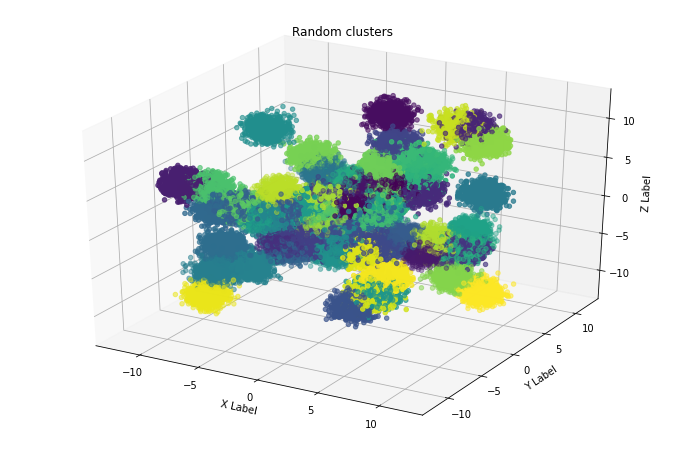

Tempo:  1.206038475036621


In [4]:
import matplotlib.pyplot as plt

start = time.time()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('Random clusters')

plt.show()
end = time.time()
print( 'Tempo: ' ,end - start)

# O incrivel e interativo mas pesadissímo Plotly

Deu pau para 600k pontos, tive que reduzir

In [5]:
import plotly.express as px

start = time.time()

fig2 = px.scatter_3d( x=X[:,0], y=X[:,1], z=X[:,2], color=y, title="Random Clusters")
fig2.show()

end = time.time()
print( 'Tempo: ' ,end - start)

Tempo:  1.5381972789764404


# Bokeh

In [6]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
# Next, we'll tell Bokeh to display its plots directly into the notebook. This will cause all of the Javascript and data to be embedded directly into the HTML of the notebook itself. (Bokeh can output straight to HTML files, or use a server, which we'll look at later.)
output_notebook()


In [7]:
start = time.time()
p = figure(width=800, height=400)
p.circle(X[:,0], X[:,1], size=y, fill_color=y, alpha=0.5)
show(p)
end = time.time()
print( 'Tempo: ' ,end - start)

Tempo:  0.738795280456543


# Chartify

In [8]:
! pip install chartify

In [18]:
import chartify

start = time.time()

data = pd.DataFrame( X, columns=['x1','x2', 'x3'] )
data['y'] = y

ch = chartify.Chart(blank_labels=True, x_axis_type='linear', y_axis_type='linear')

ch.plot.scatter(
        data_frame=data,
        color_column='y',
        x_column='x1',
        y_column='x2')
ch.set_title("Random")
ch.set_subtitle("Generated by make_blob.")

ch.show()

end = time.time()
print( 'Tempo: ' ,end - start)

Tempo:  1.588559627532959


# Seaborn

Tempo:  0.17882037162780762


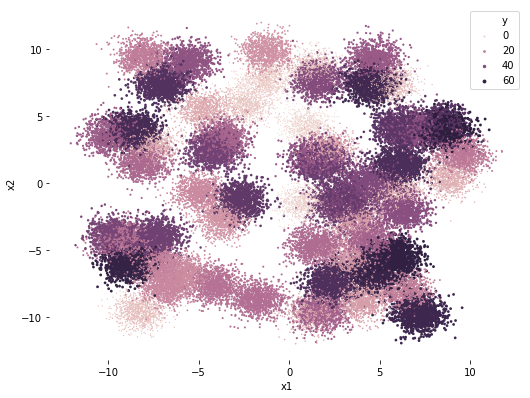

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

start = time.time()

data = pd.DataFrame( X, columns=['x1','x2', 'x3'] )
data['y'] = y

f, ax = plt.subplots(figsize=(8.5, 6.5))

sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="x1", y="x2",
                hue="y", size="y",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)



end = time.time()
print( 'Tempo: ' ,end - start)


# Altair

Não rodou não: https://altair-viz.github.io/user_guide/display_frontends.html

In [ ]:
!pip install altair

In [ ]:
!pip install vega
!jupyter nbextension install --sys-prefix --py vega

In [31]:
import altair as alt

alt.renderers.enable('notebook')
start = time.time()

data = pd.DataFrame( X, columns=['x1','x2', 'x3'] )
data['y'] = y

alt.Chart(data).mark_circle(size=60).encode(
    x='x1',
    y='x2',
    color='y',
    tooltip=['x1', 'x2', 'x3', 'y']
).interactive()


end = time.time()
print( 'Tempo: ' ,end - start)

Tempo:  0.044423818588256836


# Leather

Apenas cria SVG

In [32]:
!pip install leather

In [37]:
import leather

def colorizer(d):
    return 'rgb(%i, %i, %i)' % (d.x, d.y, 150)

chart = leather.Chart('Colorized dots')
chart.add_dots(X, fill_color=colorizer)
chart.to_svg('examples/charts/colorized_dots.svg')
display(chart)